In [4]:
#%matplotlib qt5

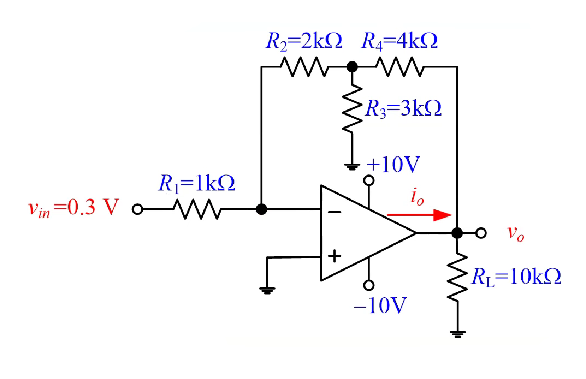

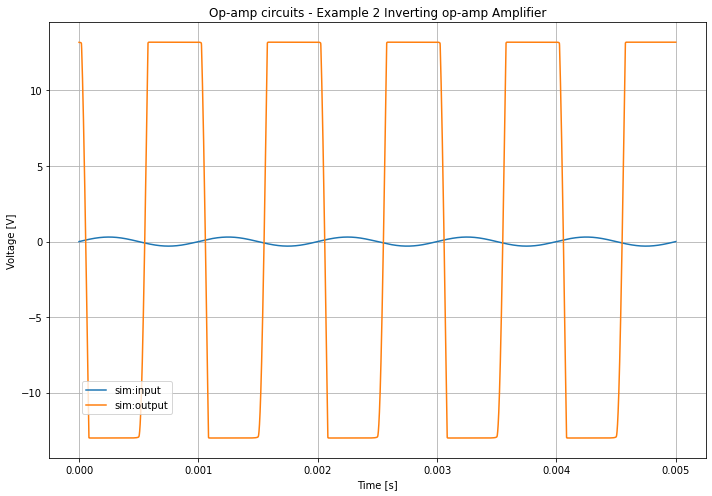

In [37]:
import math
import numpy as np
from engineering_notation import EngNumber
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
from matplotlib.pyplot import semilogx
from matplotlib import pyplot

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

##*********************************************
#libraries_path ='C:\\Users\\username\\Desktop\\PySpice\\Opamp'
#spice_library = SpiceLibrary(libraries_path)

##*********************************************
circuit = Circuit('Op-amp circuits - Example 2 Inverting op-amp Amplifier')
circuit.include("uA741.lib")

amp=0.3@u_V
freq=1@u_kHz

steptime=1@u_us
finaltime = 5*(1/freq)

source = circuit.SinusoidalVoltageSource(1, 'input', circuit.gnd, amplitude=amp, frequency = freq)


circuit.V(2, '+Vcc', circuit.gnd,15@u_V)
circuit.V(3, '-Vcc', circuit.gnd,-15@u_V)

circuit.X(1, 'uA741', circuit.gnd, 'v-', '+Vcc', '-Vcc', 'out')

circuit.R(1, 'input', 'v-',    1@u_kΩ)
circuit.R(2, 'v-', 'x',        10@u_kΩ)
circuit.L(3, 'x', circuit.gnd, 1@u_uH)
circuit.R(4, 'x', 'out',       10@u_kOhm)
circuit.R('Load', 'out', circuit.gnd,100@u_kΩ)


##*********************************************

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=steptime, end_time=finaltime)

##*********************************************

#Gain = -(circuit.R2.resistance/circuit.R1.resistance +
#        circuit.R4.resistance/circuit.R1.resistance+
 #      (circuit.R2.resistance*circuit.R4.resistance)/
  #      (circuit.R1.resistance*circuit.R3.resistance))

time=np.array(analysis.time)
#vout = Gain*(amp)*(np.sin(2*np.pi*freq*time))

#print(vout)
##*********************************************

figure, axe = plt.subplots(figsize=(10, 7))

plt.title('Op-amp circuits - Example 2 Inverting op-amp Amplifier')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()

plot(analysis['input'])
plot(analysis['out'])
#plt.plot(time,vout)

plt.legend(('sim:input', 'sim:output', 'theory'), loc=(.05,.1))
cursor = Cursor(axe, useblit=True, color='blue', linewidth=1)
plt.tight_layout()
plt.show()